# Search stocks

In [9]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [10]:
futures = [
"ES=F",
"YM=F",
"NQ=F",
"RTY=F",
"ZB=F",
"ZN=F",
"ZF=F",
"ZT=F",
"GC=F",
"MGC=F",
"SI=F",
"SIL=F",
"PL=F",
"HG=F",
"PA=F",
"CL=F",
"HO=F",
"NG=F",
"RB=F",
"BZ=F",
"B0=F",
"ZC=F",
"ZO=F",
"KE=F",
"ZR=F",
"ZM=F",
"ZL=F",
"ZS=F",
"GF=F",
"HE=F",
"LE=F",
"CC=F",
"KC=F",
"CT=F",
"LBS=F",
"OJ=F",
"SB=F",
"VX=F"
]

ma_count = 21


data = pdr.get_data_yahoo(futures, start="2020-01-01", end=dt.date.today())['Close']
data.tail()


/usr/local/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'B0=F', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'VX=F', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Symbols,ES=F,YM=F,NQ=F,RTY=F,ZB=F,ZN=F,ZF=F,ZT=F,GC=F,MGC=F,...,HE=F,LE=F,CC=F,KC=F,CT=F,LBS=F,OJ=F,SB=F,B0=F,VX=F
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-16,4223.00,34017.000000,13981.250000,2314.500000,159.40625,132.703125,123.984375,110.328125,1859.500000,1859.500000,...,115.500000,122.300003,2347.0,153.350006,85.330002,967.900024,NaN,17.040001,NaN,NaN
2021-06-17,4222.25,33805.000000,14165.500000,2288.800049,161.31250,132.906250,123.921875,110.320312,1773.800049,1773.800049,...,111.000000,120.099998,2311.0,149.550003,84.169998,904.900024,NaN,16.549999,NaN,NaN
2021-06-18,4187.25,33424.070312,14107.429688,2259.469971,162.53125,133.156250,123.820312,110.238281,1767.900024,1767.900024,...,108.675003,121.050003,2302.0,149.899994,84.419998,897.900024,NaN,16.430000,NaN,NaN
2021-06-21,4213.75,33761.000000,14130.000000,2280.899902,161.62500,133.062500,123.835938,110.246094,1781.800049,1781.800049,...,107.050003,120.974998,2308.0,152.350006,84.089996,932.500000,NaN,16.780001,NaN,NaN
2021-06-22,4235.25,33829.000000,14263.250000,2291.199951,160.00000,132.375000,123.460938,110.167969,1776.000000,1776.000000,...,107.675003,123.474998,2396.0,151.649994,86.160004,890.500000,121.199997,16.770000,NaN,NaN


In [11]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 2].size)
lead_comps_df = df[df['count'] >= 2]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

10


,name,count,ma_diff,ma_size,ma_type
9,GF=F,30,5.619626,21,daily
4,CL=F,21,5.007904,21,daily
10,LE=F,11,4.490136,21,daily
6,NG=F,19,4.425195,21,daily
8,BZ=F,14,4.196453,21,daily
1,NQ=F,21,2.878107,21,daily
5,HO=F,3,2.566278,21,daily
7,RB=F,3,2.173215,21,daily
0,ES=F,2,0.458580,21,daily
3,ZB=F,21,0.330329,21,daily


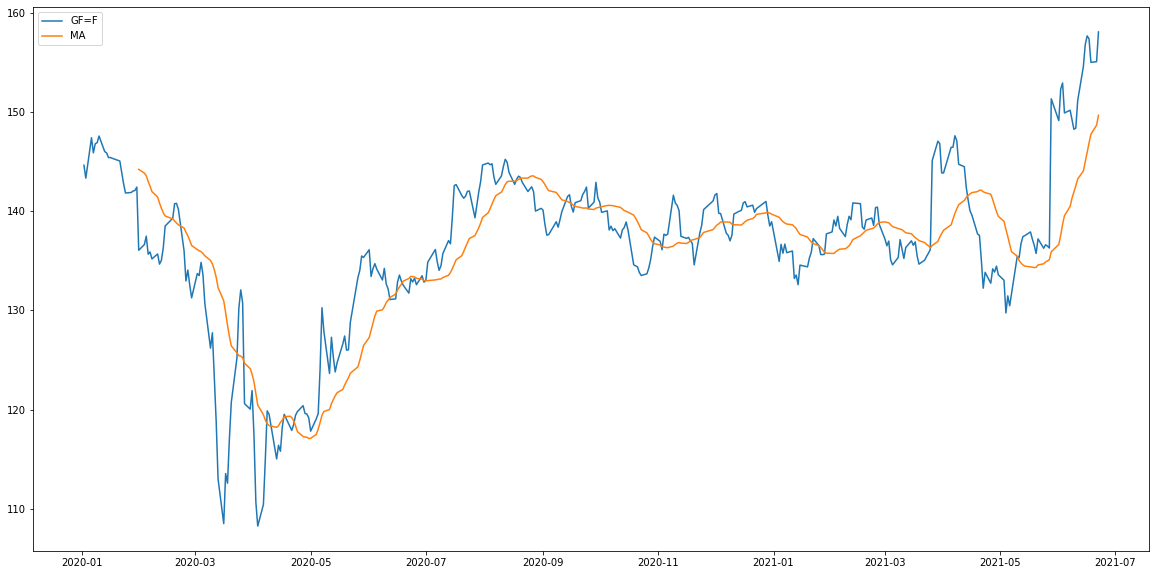

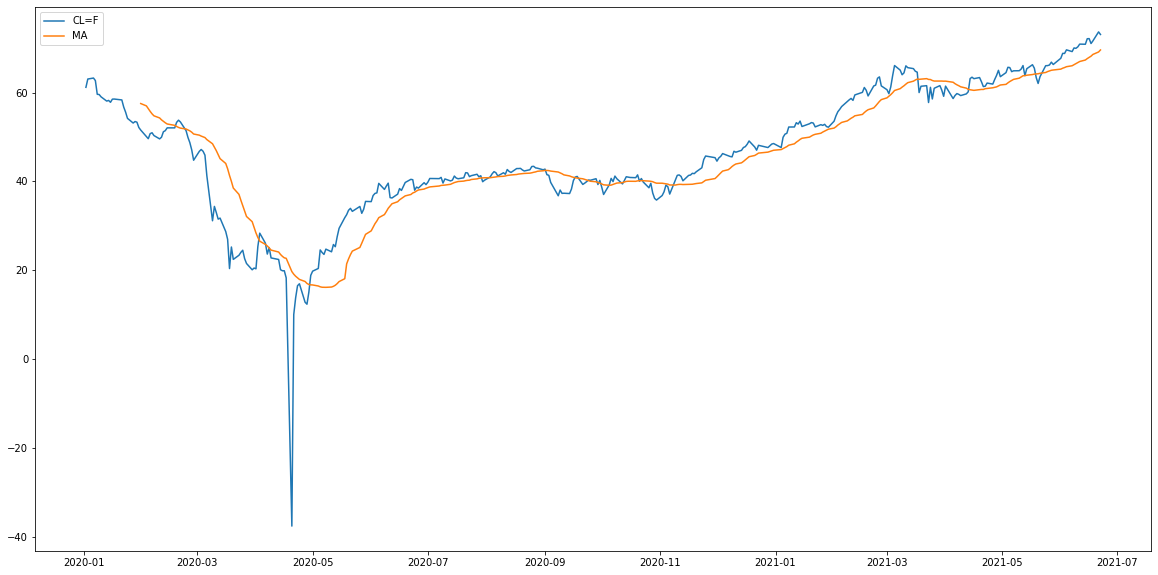

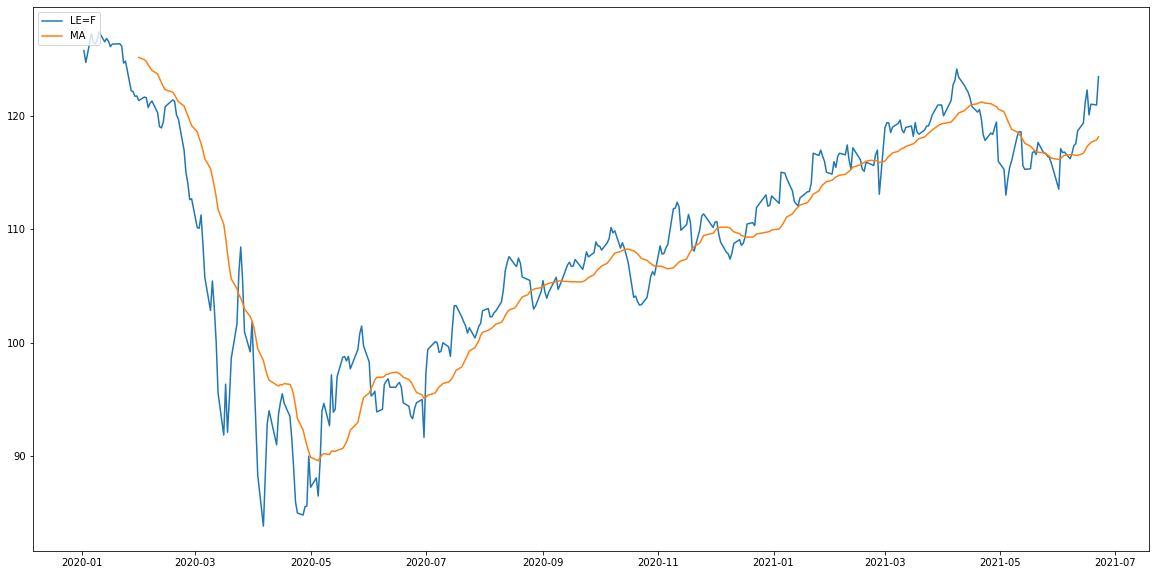

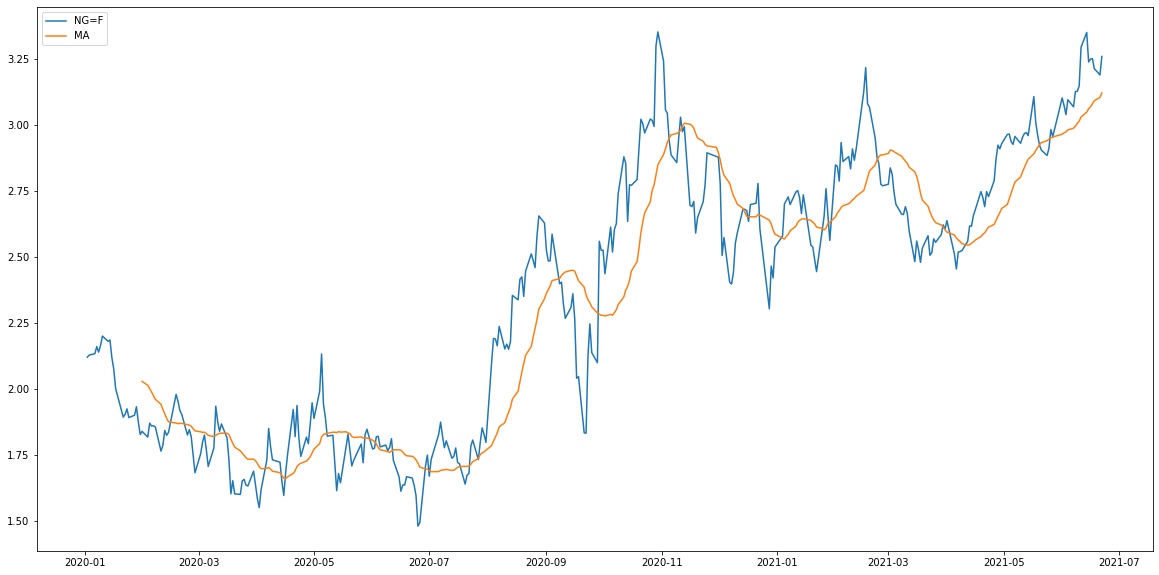

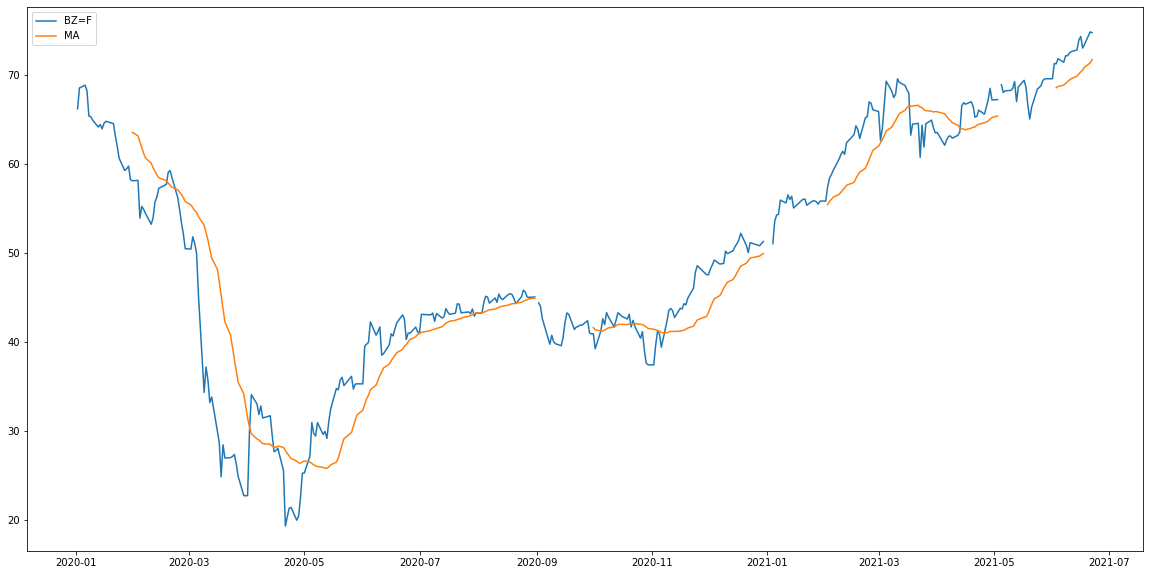

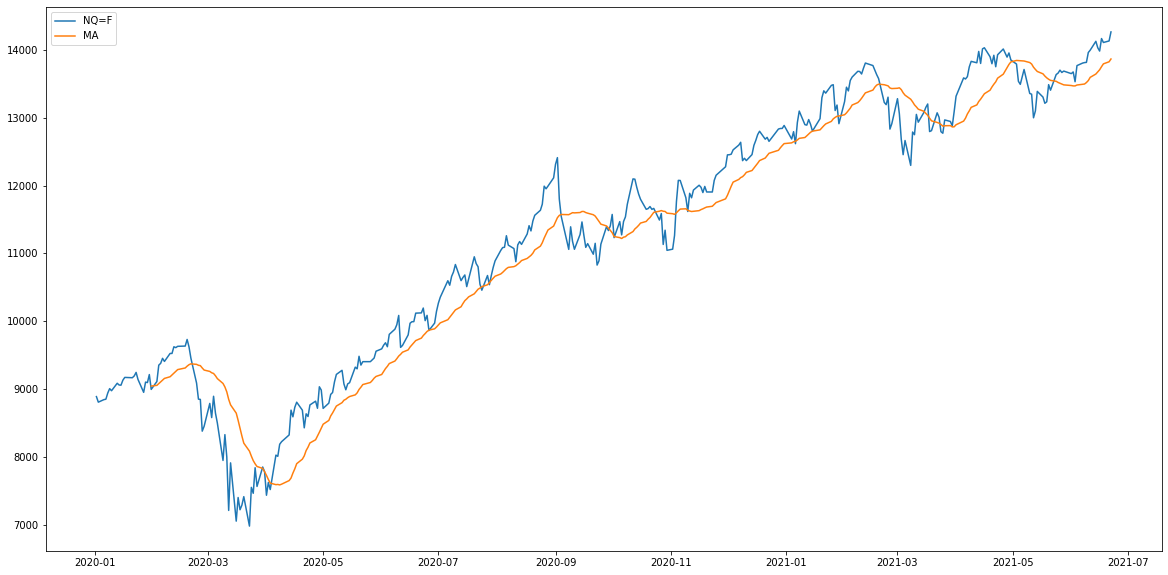

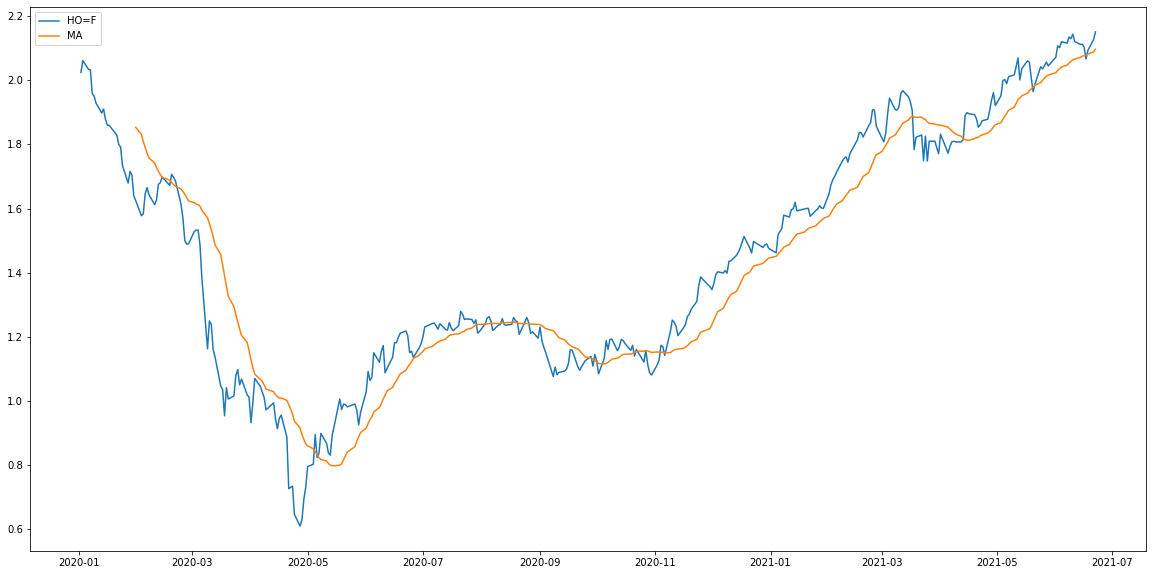

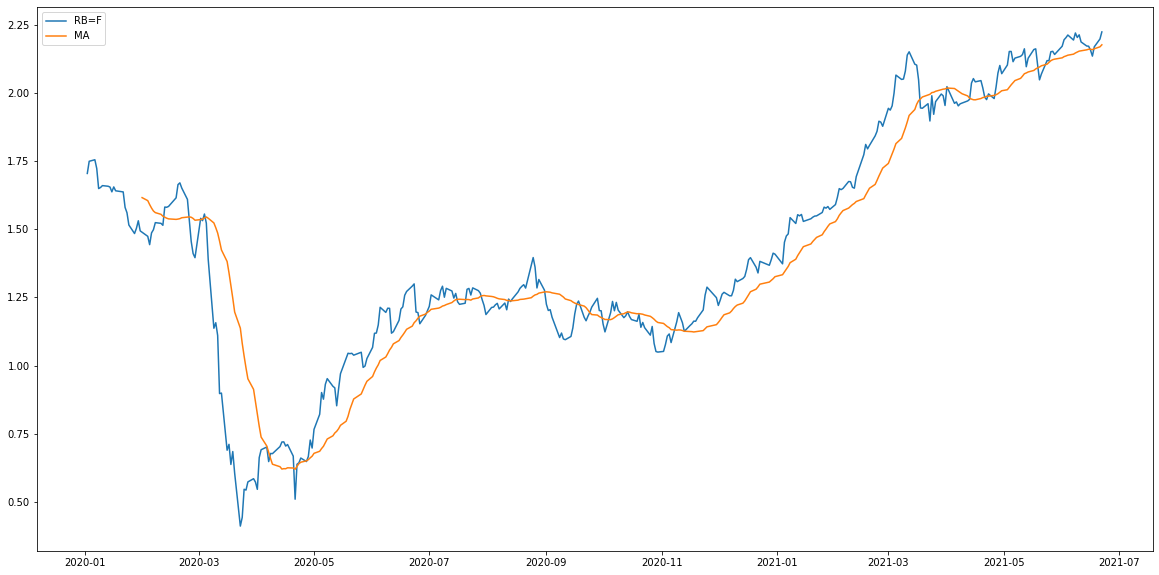

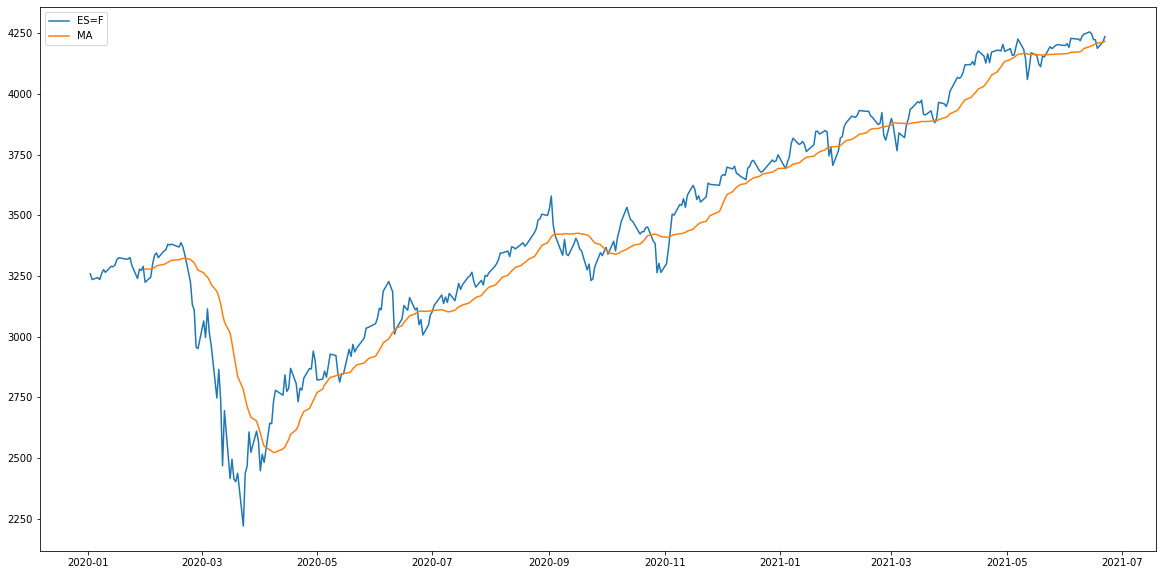

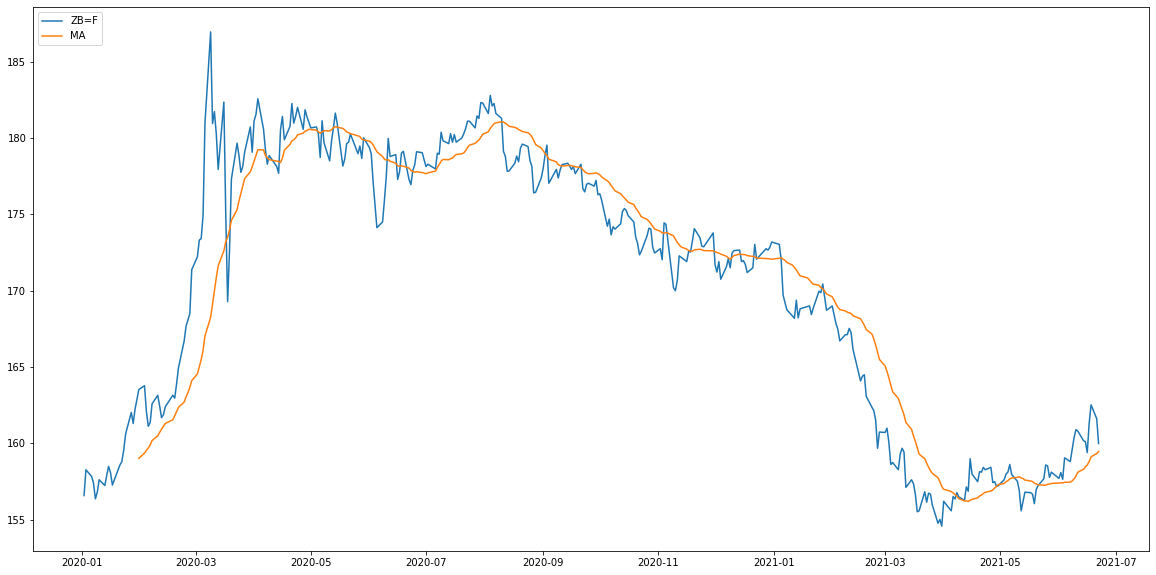

In [12]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);